## Алгоритм k ближайших соседей. Практика

В этом задании Вам предстоит применить на практике алгоритм k-ближайших соседей. В этом задании **запрещается** менять уже написанный код, Вы можете дописывать свой только в указанных ячейках.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# %matplotlib inline

import seaborn as sns

sns.set()
sns.set_style("whitegrid")

Мы будем работать с датасетом [Biomechanical features of orthopedic patients](http://archive.ics.uci.edu/dataset/212/vertebral+column). Датасет содержит в себе информацию о пациентах, обратившихся за помощью с позвоночником. Каждый пациент описывается шестью признаками, полученными на основе формы и ориентации таза и поясничного отдела позвоночника:
- pelvic incidence (опускание таза);
- pelvic tilt (наклон таза);
- lumbar lordosis angle (угол поясничного лордоза);
- sacral slope (крестцовый наклон);
- pelvic radius (радиус таза);
- grade of spondylolisthesis (степень спондилолистеза).

Ваша задача научиться относить пациентов к одному из 3-х классов:
- Normal (Нормальный);
- Hernia (Грыжа);
- Spondylolisthesis (Спондилолистез).

In [ ]:
df = pd.read_csv('data/column_3C_weka.csv')
df['class'] = df['class'].astype('category')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


### EDA (1 балл)

Выполните разведочный анализ данных. Для этого:
- посчитайте, сколько объектов каждого класса;
- выведите основные статистики (`min`, `max`, `mean`, `std` и др.) для признаков;
- постройте графики распределений признаков с учетом классов.

Какие выводы Вы можете сделать из полученных графиков? Напишите их в комментарии.

In [ ]:
# напишите свое решение тут

class
Hernia                60
Normal               100
Spondylolisthesis    150
Name: count, dtype: int64

In [ ]:
# напишите свое решение тут

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


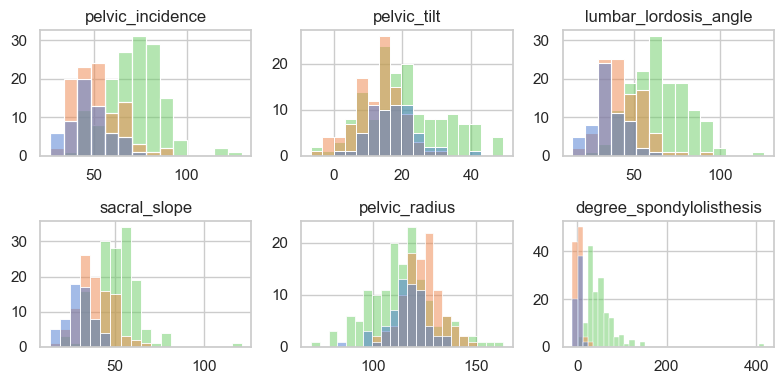

In [ ]:
# напишите свое решение тут

In [ ]:
# напишите здесь свои выводы

### Обучите модель (1 балл)

В этом пункте Вам нужно подготовить обучающие и валидационные выборки для оценки качества модели. Не забудьте сделать так, чтобы Ваше разбиение было воспроизводимым. В этом **НЕ используйте** кросс-валидацию.

Обучите алгоритм knn с параметрами по умолчанию. Оцените качество вашего алгоритма по метрике `accuracy`.

In [ ]:
target = 'class'
features = [col for col in df.columns if col != target]

X, y = df[features], df[target]

In [ ]:
# напишите здесь код для разбиения на обучающую и валидационную выборки

X_train, X_valid, y_train, y_valid = ...

In [ ]:
# напишите здесь код для обучения модели

### Преобразование данных (1 балл)

Вы помните, что на метрические алгоритмы может сильно влиять масштаб данных – чем больше значение признака, тем больше его влияение. Попробуйте выполнить несколько подходов стандартизации признаков.

Помогли ли эти преобразования улучшить качество на валидационной выборке? Выдвинете свои предположения, почему. Проверьте свою гипотезу через функцию кросс-валидации `cross_val_score`.

Для удобства написания кода можете воспользоваться [`Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
kfold = StratifiedKFold(shuffle=True, random_state=56)

In [ ]:
# оцените модели без преобразования данных и с преобразованиями
# можете создавать дополнительные ячейки

In [ ]:
# напишите здесь свои выводы

### Подбор гиперпаметров (3 балла)

На основе предыдущего шага выберите одно финальное преобразование данных, которое дает лучшее качество.

Теперь подберите лучшие гиперпараметры для вашего алгоритма:
- количество ближайших соседей: `n_neighbors`;
- функцию расстояния: `['euclidean', 'manhattan']`;
- алгоритм взвешивания: `['uniform', 'distance']`.

**Запрещается** использовать автоматизированные средства подбора гиперпаметров в виде, например, [GridSearchCV](https://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers) и других сторонних библиотек.

Постройте график зависимости `accuracy` от `n_neighbors` при разных значениях гиперпараметров.

Дайте ответ при каких значения параметров достигается лучшее качество.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

kfold = StratifiedKFold(shuffle=True, random_state=56)
neighbors_vals = np.arange(1, 14)

best_params, best_score = {}, 0

# добавьте код для поиска наилучших гиперпараметров модели

print('Best params:', best_params)
print('Best score:', best_score)

ax.set_title('Finding best K')
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.legend(loc='lower right')

### Эффективный подбор гиперпараметра K (4 балла)

Заметим, что самая дорогая (сложная) операция в алгоритме k-ближайших соседей – это поиск соседей. Классический алгоритм основан на алгоритме полного перебора, т.е. каждый объект тестовой выборки нужно сравнить с каждым объектом обучающей выборки. В случае большой обучающей выборки – это очень дорогая операция.

Предположим, что у нас есть некоторая отложенная выборка, на которой мы хотим подобрать лучший параметр `k` из списка `ks`, число ближайших соседей. В нативном варианте нам нужно перебрать все значения параметра из списка `ks`.

Легко заметить, что можно сделать следующую оптимизацию – достаточно найти соседей только для наибольшего `k_max`, тогда соседи для всех `k` меньших `k_max` также будут найдены.

Реализуйте функцию `predict_precomputed`, которая по аргументам:
- `y` – метки для объектов обучающей выборки;
- `weights` – стратегия взвешивания: `uniform` или `distance`;
- `distances` – матрица расстояний до ближайшего соседа из обучающей выборки;
- `indices` – индексы ближайших соседей из обучающей выборки;

вычисляет предсказанные метки.

Ознакомьтесь с методом [`KNeighborsClassifier.kneighbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors). В реализации этого задания Вам могут пригодиться функция `np.bincount` с аргументами `weights` и `minlength`.

Замените на предыдущем этапе функцию `cross_val_score` на новую реализацию `knn_cross_val_score`.

In [ ]:
def predict_precomputed(y, weights, distances, indices):
    """ Вычисляет метки для каждого объекта тестовой выборки.
    Пусть:
        - N x dim – объекты обучающей выборки;
        - M x dim – объекты тестовой выборки;
        - k_max – число ближайших соседей.

    Аргументы:
        - y : np.ndarray – метки объектов обучающей выборки, y.shape = (N, );
        - weights : Union[str, Callable] – стратегия взвешивая: 'uniform', 'distance'
            или функция для расчета весов;
        - distances : np.ndarray – расстояния от каждого объекта тестовой выборки
            до k_max ближайших соседей, distances.shape = (M, k_max);
        - indices : np.ndarray – индексы ближайших соседей из обучающей выборки,
            indices.shape = (M, k_max).

    Возвращаемое значение:
        - labels : np.ndarray – предсказанное значение метки для каждого объекта
            тестовой выборки, labels.shape = (M, ).
    """
    EPS = 1e-4

    n_objects = indices.shape[0]
    n_classes = np.max(y) + 1

    if weights == 'uniform':
        weights = None
    elif weights == 'distance':
        weights = 1. / (distances + EPS)
    elif callable(weights):
        weights = weights(distances)
    else:
        raise ValueError("Weighted algorithm is not supported", weights)

    # вычислите метки для объектов
    labels = ...

    return labels

In [ ]:
from collections import defaultdict

from sklearn.metrics import accuracy_score
from sklearn.model_selection import BaseCrossValidator


def knn_cross_val_score(X, y, scoring="accuracy", cv=None, **kwargs):
    ks = kwargs.pop('n_neighbors')
    k_max = max(ks)

    knn = KNeighborsClassifier(n_neighbors=k_max, **kwargs)

    scores = defaultdict(list)

    if scoring == "accuracy":
        scorer = accuracy_score
    else:
        raise ValueError("Unknown scoring metric", scoring)

    if cv is None:
        cv = StratifiedKFold(n_splits=5, shuffle=True)
    elif isinstance(cv, int):
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=cv)
    elif not isinstance(cv, BaseCrossValidator):
        raise TypeError("cv should be BaseCrossValidator instance", type(cv))

    for idx_train, idx_valid in cv.split(X, y):
        X_train, y_train = X.loc[idx_train], y[idx_train].cat.codes.values.astype(np.int32)
        X_valid, y_valid = X.loc[idx_valid], y[idx_valid].cat.codes.values.astype(np.int32)

        knn.fit(X_train, y_train)
        distances, indices = knn.kneighbors(X_valid, return_distance=True)

        for k in ks:
            y_pred = predict_precomputed(
                y_train,
                knn.get_params()['weights'],
                distances[:, :k],
                indices[:, :k],
            )
            scores[k].append(scorer(y_valid, y_pred))

    scores = {k: np.asarray(v) for k, v in scores.items()}
    return scores

In [ ]:
# проверяем правильность реализации knn_cross_val_score

ks = [3, 5, 7]

for weights in ['uniform', 'distance']:
    scores = knn_cross_val_score(X, y, cv=kfold, n_neighbors=ks, weights=weights)
    for k in ks:
        score_a = scores[k]
        score_b = cross_val_score(
            KNeighborsClassifier(n_neighbors=k, weights=weights),
            X, y, cv=kfold,
        )
        assert np.allclose(score_a, score_b)

In [ ]:
neighbors_vals = np.arange(1, 15)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

kfold = StratifiedKFold(shuffle=True, random_state=56)
neighbors_vals = np.arange(1, 14)

best_params, best_score = {}, 0

# добавьте код для поиска наилучших гиперпараметров модели

print('Best params:', best_params)
print('Best score:', best_score)

ax.set_title('Finding best K')
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.legend(loc='lower right')